In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
import warnings
import pickle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import warnings

warnings.filterwarnings("ignore")

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Project Heart Disease/Iraq hospital dataset.csv")

In [11]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [12]:
df.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [13]:
df.shape

(1319, 9)

In [14]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [15]:
df.keys()

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [16]:
df.rename(columns={'class': 'target'}, inplace=True)

In [17]:
df['target'] = df['target'].replace({'positive': 1, 'negative': 0})

In [18]:
df['target'].value_counts()

target
1    810
0    509
Name: count, dtype: int64

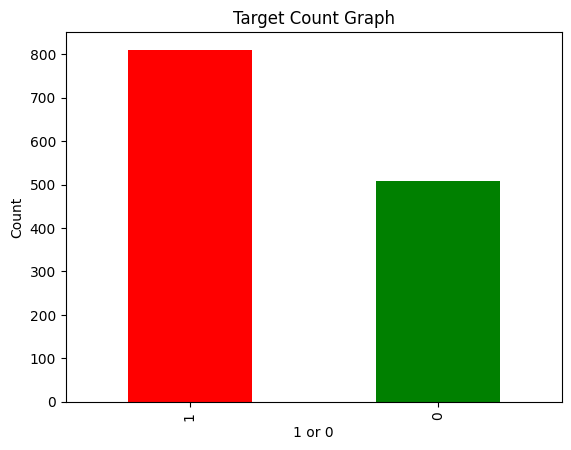

In [19]:
#Graphical Representation of count value of class column
color = ['r','g']
df['target'].value_counts().plot(kind='bar',color =color)
plt.xlabel("1 or 0")
plt.ylabel("Count")
plt.title("Target Count Graph")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   target         1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [21]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,target
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [22]:
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)
cormat = df.corr()
print(cormat)
cormat = cormat.dropna(how = 'all', axis=1)
cormat = cormat.dropna(how = 'all', axis=0)
cormat.style.background_gradient(cmap='coolwarm')

                    age    gender   impluse  pressurehight  pressurelow  \
age            1.000000 -0.092874 -0.023440       0.017441     0.002614   
gender        -0.092874  1.000000 -0.026781       0.011065    -0.009370   
impluse       -0.023440 -0.026781  1.000000       0.010882     0.108353   
pressurehight  0.017441  0.011065  0.010882       1.000000     0.586166   
pressurelow    0.002614 -0.009370  0.108353       0.586166     1.000000   
glucose       -0.004193  0.006668 -0.019584       0.020807    -0.025614   
kcm            0.018419  0.017527 -0.013001      -0.016396    -0.023403   
troponin       0.088800  0.065793  0.011180       0.043729     0.043360   
target         0.238097  0.094432  0.006920      -0.020825    -0.009659   

                glucose       kcm  troponin    target  
age           -0.004193  0.018419  0.088800  0.238097  
gender         0.006668  0.017527  0.065793  0.094432  
impluse       -0.019584 -0.013001  0.011180  0.006920  
pressurehight  0.020807 -

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,target
age,1.000000,-0.092874,-0.023440,0.017441,0.002614,-0.004193,0.018419,0.088800,0.238097
gender,-0.092874,1.000000,-0.026781,0.011065,-0.009370,0.006668,0.017527,0.065793,0.094432
impluse,-0.023440,-0.026781,1.000000,0.010882,0.108353,-0.019584,-0.013001,0.011180,0.006920
pressurehight,0.017441,0.011065,0.010882,1.000000,0.586166,0.020807,-0.016396,0.043729,-0.020825
pressurelow,0.002614,-0.009370,0.108353,0.586166,1.000000,-0.025614,-0.023403,0.043360,-0.009659
glucose,-0.004193,0.006668,-0.019584,0.020807,-0.025614,1.000000,0.045757,0.021069,-0.033059
kcm,0.018419,0.017527,-0.013001,-0.016396,-0.023403,0.045757,1.000000,-0.016008,0.217720
troponin,0.088800,0.065793,0.011180,0.043729,0.043360,0.021069,-0.016008,1.000000,0.229376
target,0.238097,0.094432,0.006920,-0.020825,-0.009659,-0.033059,0.217720,0.229376,1.000000


In [23]:
cormat.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,target
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.138318,0.118496,0.117170,0.183652,0.185828,0.112428,0.136735,0.165255,0.191445
std,0.335826,0.334810,0.333596,0.361184,0.361908,0.333805,0.332249,0.320870,0.323541
min,-0.092874,-0.092874,-0.026781,-0.020825,-0.025614,-0.033059,-0.023403,-0.016008,-0.033059
25%,-0.004193,-0.009370,-0.019584,0.010882,-0.009659,-0.019584,-0.016008,0.021069,-0.009659
50%,0.017441,0.011065,0.006920,0.017441,0.002614,0.006668,0.017527,0.043729,0.094432
75%,0.088800,0.065793,0.011180,0.043729,0.108353,0.021069,0.045757,0.088800,0.229376
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## function for final dataset

In [24]:
def getCorrelationFeature(corrdata,threshold):
    feature=[]
    value=[]
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df=pd.DataFrame(data=value,index=feature,columns=['corr values'])
    return df

In [25]:
threshold=0.03
corr_value=getCorrelationFeature(cormat['target'],threshold)
corr_value

,corr values
age,0.238097
gender,0.094432
glucose,-0.033059
kcm,0.217720
troponin,0.229376
target,1.000000


In [26]:
correlated_data=df[corr_value.index]
correlated_data.head()

,age,gender,glucose,kcm,troponin,target
0,64,1,160.0,1.80,0.012,0
1,21,1,296.0,6.75,1.060,1
2,55,1,270.0,1.99,0.003,0
3,64,1,270.0,13.87,0.122,1
4,55,1,300.0,1.08,0.003,0


In [27]:
correlated_data.shape

(1319, 6)

In [28]:
correlated_data.var()

age          186.249220
gender         0.224701
glucose     5613.462621
kcm         2146.198651
troponin       1.333026
target         0.237161
dtype: float64

In [29]:
import statsmodels.api as sm

In [30]:
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [sm.OLS(data_frame[col], sm.add_constant(data_frame.drop(columns=[col]))
                         ).fit().rsquared for col in data_frame]
    return vif_data

# Apply VIF to your training data
vif_data = calculate_vif(correlated_data)
print(vif_data)

   Variable       VIF
0       age  0.072799
1    gender  0.025589
2   glucose  0.005249
3       kcm  0.056069
4  troponin  0.061602
5    target  0.159201


In [31]:
cr = correlated_data.corr()
cr.style.background_gradient(cmap='coolwarm')

,age,gender,glucose,kcm,troponin,target
age,1.000000,-0.092874,-0.004193,0.018419,0.088800,0.238097
gender,-0.092874,1.000000,0.006668,0.017527,0.065793,0.094432
glucose,-0.004193,0.006668,1.000000,0.045757,0.021069,-0.033059
kcm,0.018419,0.017527,0.045757,1.000000,-0.016008,0.217720
troponin,0.088800,0.065793,0.021069,-0.016008,1.000000,0.229376
target,0.238097,0.094432,-0.033059,0.217720,0.229376,1.000000


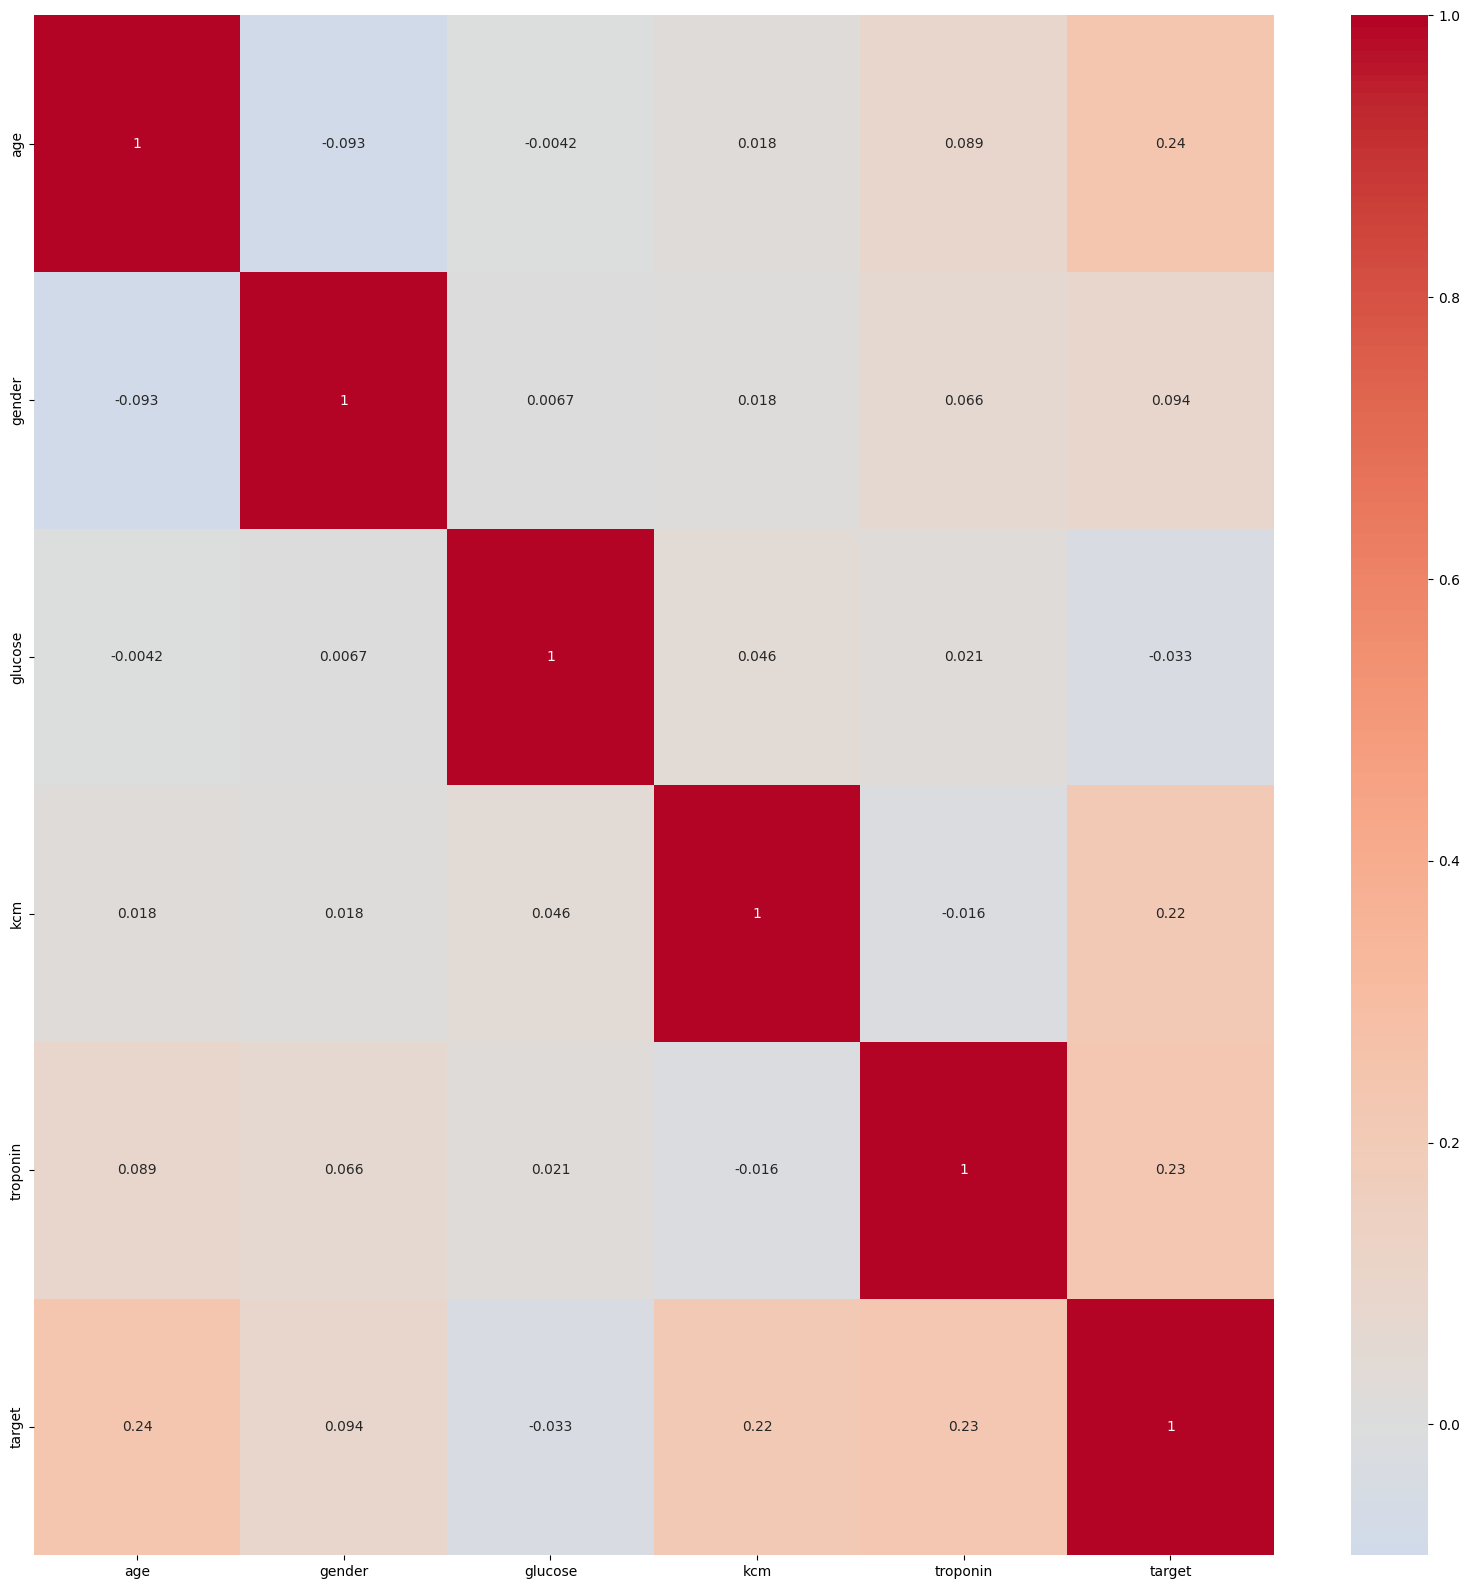

In [32]:
fig , ax = plt.subplots(figsize=(20,20))
sns.heatmap(cr, cmap='coolwarm', center=0, annot=True)
plt.savefig("hea_t.png",dpi=300)
#sns.heatmap(cr, cmap='BrBG', center=0, annot=True)
#sns.heatmap(cr, annot=True, ax=ax)

## TRAIN TEST SPLIT

In [33]:
#Splitting the data into train and test case
x=correlated_data.drop(labels=['target'],axis=1)
y=correlated_data['target']
x.head()

,age,gender,glucose,kcm,troponin
0,64,1,160.0,1.80,0.012
1,21,1,296.0,6.75,1.060
2,55,1,270.0,1.99,0.003
3,64,1,270.0,13.87,0.122
4,55,1,300.0,1.08,0.003


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [35]:
print(X_train.shape,X_test.shape)

(1121, 5) (198, 5)


In [36]:
y_train.shape,y_test.shape

((1121,), (198,))

In [37]:
test_y = np.array(y_test)
test_y

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [38]:
y_train =np.array(y_train)
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [39]:
X_test

,age,gender,glucose,kcm,troponin
677,76,1,144.0,297.50,0.024
1046,30,0,93.0,3.93,0.003
610,50,1,111.0,2.55,0.006
49,38,0,133.0,1.19,0.003
1284,29,1,100.0,6.48,0.003
...,...,...,...,...,...
48,46,1,96.0,1.33,0.009
113,57,1,83.0,40.99,7.670
155,70,0,84.0,1.27,0.005
291,63,0,126.0,1.93,0.007


# Feature Scaling

In [40]:
scaler = StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

In [41]:
x_test

array([[ 1.43534245e+00,  7.07106781e-01, -1.28697047e-02,
         6.47871980e+00, -2.99836418e-01],
       [-1.97354908e+00, -1.41421356e+00, -6.82757736e-01,
        -2.64456656e-01, -3.16171845e-01],
       [-4.91422330e-01,  7.07106781e-01, -4.46326666e-01,
        -2.96154661e-01, -3.13838213e-01],
       [-1.38069838e+00, -1.41421356e+00, -1.57355359e-01,
        -3.27393276e-01, -3.16171845e-01],
       [-2.04765542e+00,  7.07106781e-01, -5.90812320e-01,
        -2.05884254e-01, -3.16171845e-01],
       [ 4.71960059e-01,  7.07106781e-01,  2.10426306e-01,
        -2.86507442e-01,  1.70001592e-01],
       [ 6.20172735e-01,  7.07106781e-01, -5.90812320e-01,
        -1.62242072e-01, -3.06837315e-01],
       [-2.69103317e-01,  7.07106781e-01, -5.90812320e-01,
        -3.36695951e-01,  1.55221919e-01],
       [-4.91422330e-01,  7.07106781e-01, -7.22162915e-01,
        -3.31895311e-01,  3.53580681e-01],
       [ 9.90704423e-01, -1.41421356e+00, -8.27243390e-01,
        -2.33677433e-01

## WORK FOR TRAINING DATA

Cross validation

In [42]:
#list of models
models = [LogisticRegression(max_iter=30000),SVC(kernel='linear',probability=True),KNeighborsClassifier(n_neighbors=10),RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=50),GaussianNB(),DecisionTreeClassifier(max_depth = 5) ]

In [43]:

def compare_models_cross_validation():
    mean_accuracy = []
    mean_precision = []
    mean_recall = []
    mean_f1 = []
    for model in models:
        cv_score = cross_val_score(model,x_train,y_train,cv=15)
        mean_acc = (sum(cv_score)/len(cv_score))
        mean_accuracy.append(mean_acc)
        mean_prec = cross_val_score(model,x_train,y_train,scoring = 'precision',cv=15).mean()
        mean_precision.append(mean_prec)
        mean_rec = cross_val_score(model,x_train,y_train,scoring = 'recall',cv=15).mean()
        mean_recall.append(mean_rec)
        mean_f1_score = cross_val_score(model,x_train,y_train,scoring = 'f1',cv=15).mean()
        mean_f1.append(mean_f1_score)
        #y_cv_pred= cross_val_predict(model,x_train,y_train,cv=10)
        #y_cv_tpred= cross_val_predict(model,x_test,y_test,cv=10)
    return mean_accuracy,mean_precision,mean_recall,mean_f1

In [44]:
mean_accuracy,mean_precision,mean_recall,mean_f1= compare_models_cross_validation()
for i,model in enumerate(models):
    print("---------------------------------------")
    print("Model:",model)
    print('Mean Accuracy = ',mean_accuracy[i])
    print('Mean Precision = ',mean_precision[i])
    print('Mean Recall = ',mean_recall[i])
    print('Mean F1_score = ',mean_f1[i])
    #print('y_train prediction',y_cv_pred[i])
    #print('y_testing prediction',y_cv_tpred[i])
    print("-------------------------------------")

---------------------------------------
Model: LogisticRegression(max_iter=30000)
Mean Accuracy =  0.8099819819819819
Mean Precision =  0.8597575834009753
Mean Recall =  0.8295713845205056
Mean F1_score =  0.8431123483668295
-------------------------------------
---------------------------------------
Model: SVC(kernel='linear', probability=True)
Mean Accuracy =  0.8242642642642644
Mean Precision =  0.9036015204880619
Mean Recall =  0.803576934936787
Mean F1_score =  0.8487079833921214
-------------------------------------
---------------------------------------
Model: KNeighborsClassifier(n_neighbors=10)
Mean Accuracy =  0.7011291291291291
Mean Precision =  0.8255667858780115
Mean Recall =  0.6561825470243602
Mean F1_score =  0.7295187278149817
-------------------------------------
---------------------------------------
Model: RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
Mean Accuracy =  0.9866306306306305
Mean Precision =  0.9931000788022064
Mean 

In [45]:
def ytprediction():
    y_pred_train = []
    for model in models:
        model.fit(x_train,y_train)
        ytrain_pred = model.predict(x_train)
        y_pred_train.append(ytrain_pred)
    return y_pred_train

In [46]:
y_pred_train=ytprediction()

In [47]:
y_pred_train[0]

array([1, 1, 0, ..., 1, 0, 1])


## CONFUSION MATRIX

In [48]:
def train_conf_matrix():
    for i, model in enumerate(models):
        cf_matrix = confusion_matrix(y_train,y_pred_train[i])
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title('Training Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted ')
        ax.set_ylabel('Actual  ');
        plt.show()
        print(model)
        print('*******************************************************')
        print()

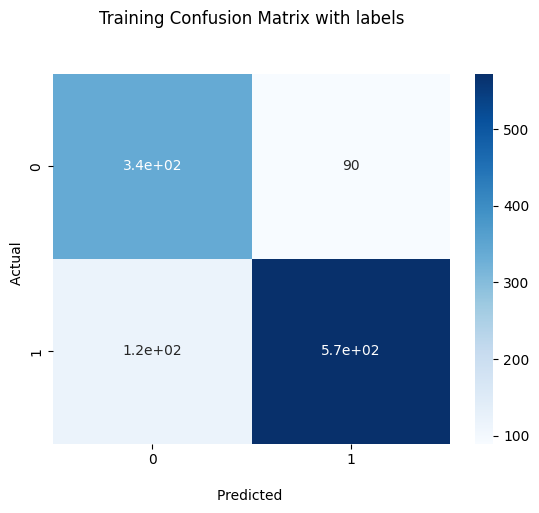

LogisticRegression(max_iter=30000)
*******************************************************



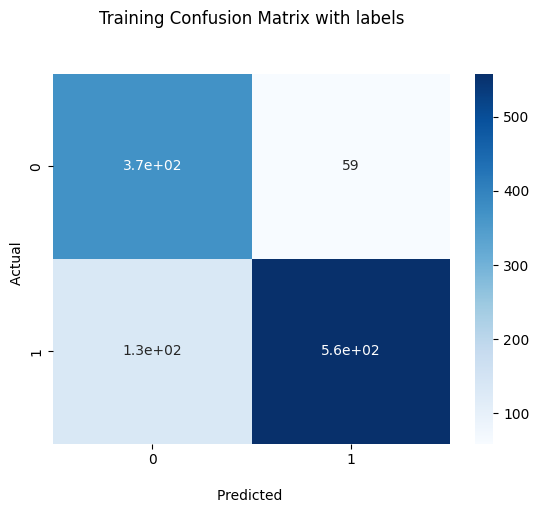

SVC(kernel='linear', probability=True)
*******************************************************



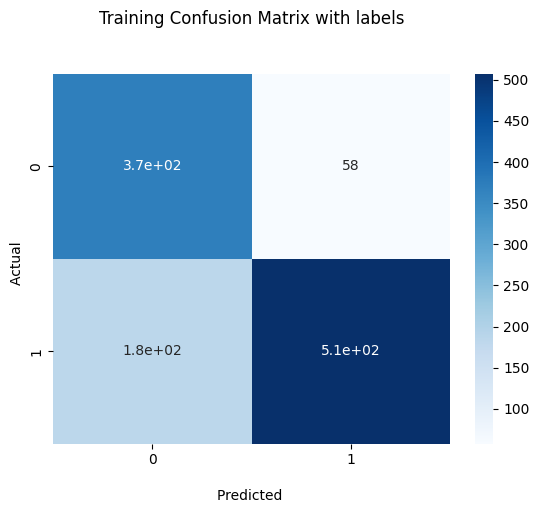

KNeighborsClassifier(n_neighbors=10)
*******************************************************



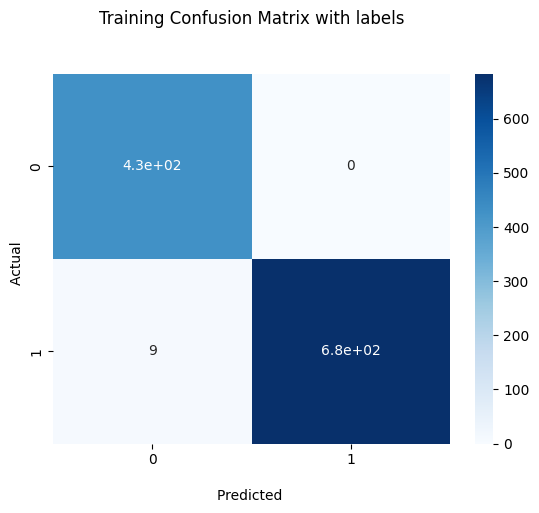

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
*******************************************************



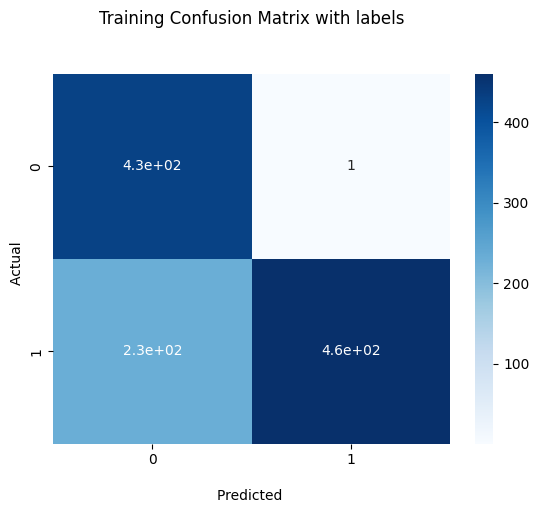

GaussianNB()
*******************************************************



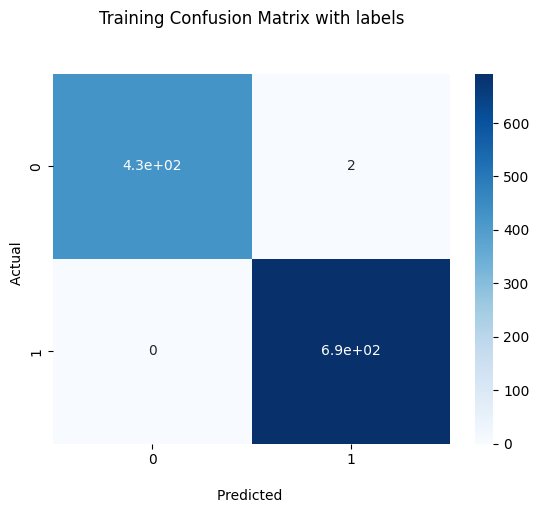

DecisionTreeClassifier(max_depth=5)
*******************************************************



In [49]:
train_conf_matrix()

In [50]:
def dp():
    tacc = []
    tprec = []
    trec = []
    tf1 = []
    #y_pred_train = []
    for i, model in enumerate(models):
        #ytrain_pred = model.predict(x_train)
        #y_pred_train.append(ytrain_pred)
        accuracy = metrics.accuracy_score(y_train,y_pred_train[i])
        #print(accuracy)
        tacc.append(accuracy)
        precision=metrics.precision_score(y_train,y_pred_train[i])
        #print(precision)
        tprec.append(precision)
        recall = metrics.recall_score(y_train,y_pred_train[i])
        #print(recall)
        trec.append(recall)
        t_f1=metrics.f1_score(y_train,y_pred_train[i])
        #print(t_f1)
        tf1.append(t_f1)
    return tacc,tprec,trec,tf1

In [51]:
tacc,tprec,trec,tf1 = dp()

In [52]:
def aprf():
    print('Displaying the values for the train data')
    for i, model in enumerate(models):
        print('-------------------------------------------------------')
        print('Accuracy of the ',model,'=',tacc[i])
        print('Precision of the ',model,'=',tprec[i])
        print('Recall of the ',model,'=',trec[i])
        print('F1 score of the ',model,'=',tf1[i])
        print('---------------------------------------------------------')

In [53]:
aprf()

Displaying the values for the train data
-------------------------------------------------------
Accuracy of the  LogisticRegression(max_iter=30000) = 0.8126672613737734
Precision of the  LogisticRegression(max_iter=30000) = 0.8640483383685801
Recall of the  LogisticRegression(max_iter=30000) = 0.8265895953757225
F1 score of the  LogisticRegression(max_iter=30000) = 0.844903988183161
---------------------------------------------------------
-------------------------------------------------------
Accuracy of the  SVC(kernel='linear', probability=True) = 0.8278322925958965
Precision of the  SVC(kernel='linear', probability=True) = 0.9043760129659644
Recall of the  SVC(kernel='linear', probability=True) = 0.8063583815028902
F1 score of the  SVC(kernel='linear', probability=True) = 0.852559205500382
---------------------------------------------------------
-------------------------------------------------------
Accuracy of the  KNeighborsClassifier(n_neighbors=10) = 0.7832292595896521
Prec

# GRAPH FOR THE TRAIN DATA

# TRAINING ACCURACY GRAPH

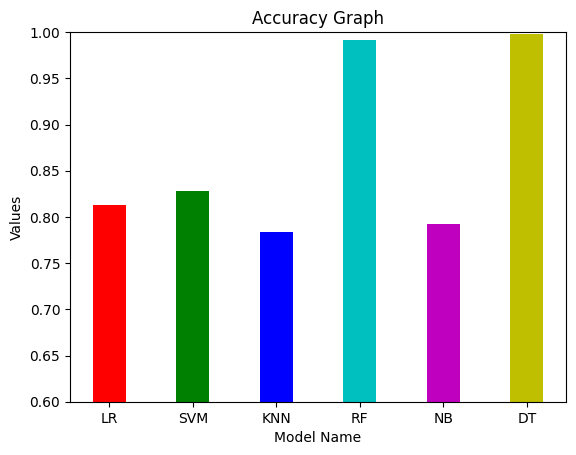

In [54]:
#graph plotting
val = {'LR':tacc[0],'SVM':tacc[1],'KNN':tacc[2],'RF':tacc[3],'NB':tacc[4],'DT':tacc[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [55]:
mod = pd.DataFrame({
    'Model': ['LR','SVM','KNN', 'RF', 'NB','DT'],
    'Score': [
        tacc[0],
        tacc[1],
        tacc[2],
        tacc[3],
        tacc[4],
        tacc[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,DT,0.998216
3,RF,0.991971
1,SVM,0.827832
0,LR,0.812667
4,NB,0.792150
2,KNN,0.783229


# TRAINING PRECISION GRAPH

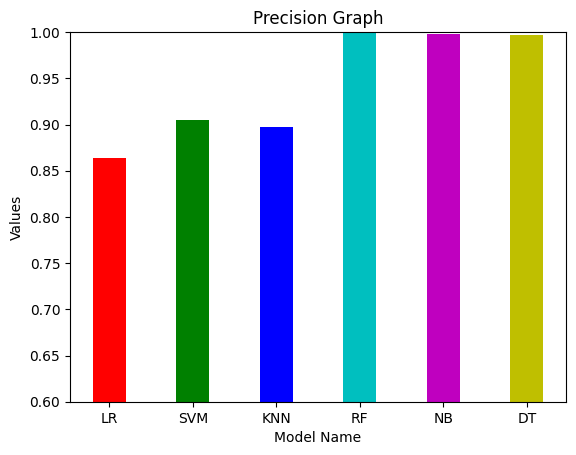

In [56]:
val = {'LR':tprec[0],'SVM':tprec[1],'KNN':tprec[2],'RF':tprec[3],'NB':tprec[4],'DT':tprec[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [57]:
mod = pd.DataFrame({
     'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        tprec[0],
        tprec[1],
        tprec[2],
        tprec[3],
        tprec[4],
        tprec[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,1.000000
4,Naive Bayes,0.997831
5,Decision Tree,0.997118
1,SVM,0.904376
2,KNN,0.897345
0,Logistic Regression,0.864048


# TRAINING RECALL GRAPH

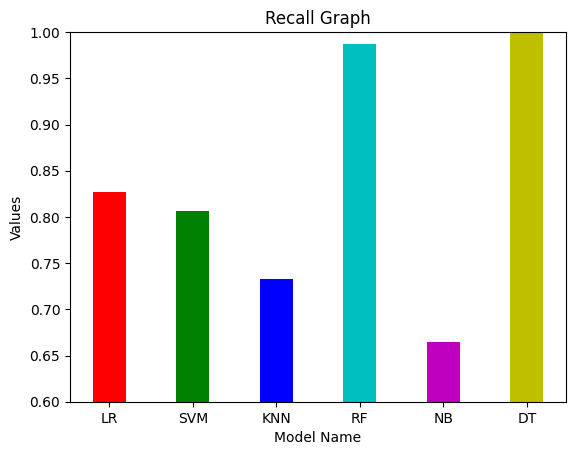

In [58]:
val = {'LR':trec[0],'SVM':trec[1],'KNN':trec[2],'RF':trec[3],'NB':trec[4],'DT':trec[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [59]:
mod = pd.DataFrame({
     'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        trec[0],
        trec[1],
        trec[2],
        trec[3],
        trec[4],
        trec[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,1.000000
3,Random Forest,0.986994
0,Logistic Regression,0.826590
1,SVM,0.806358
2,KNN,0.732659
4,Naive Bayes,0.664740


# TRAINING F1 SCORE GRPAH

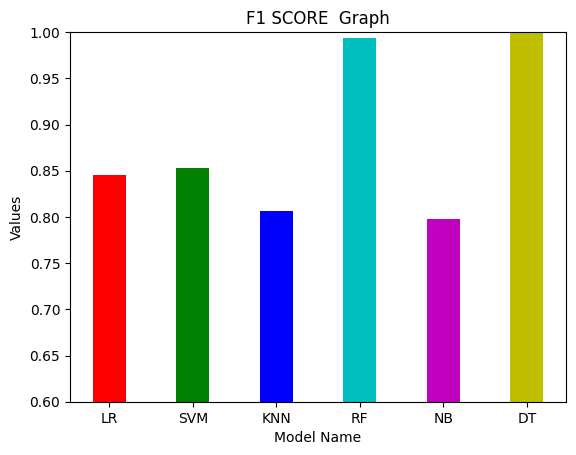

In [60]:
val = {'LR':tf1[0],'SVM':tf1[1],'KNN':tf1[2],'RF':tf1[3],'NB':tf1[4],'DT':tf1[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 SCORE  Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [61]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        tf1[0],
        tf1[1],
        tf1[2],
        tf1[3],
        tf1[4],
        tf1[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.998557
3,Random Forest,0.993455
1,SVM,0.852559
0,Logistic Regression,0.844904
2,KNN,0.806683
4,Naive Bayes,0.797918


**bold text**# TRAINING ROC CURVE

In [62]:
def trc_curv():
    for i,model in enumerate(models):
        cr_probs = model.predict_proba(x_train)
        cr_probs = cr_probs[:, 1]
        cr_auc = roc_auc_score(y_train, cr_probs)
        cr_fpr,cr_tpr, _ = roc_curve(y_train,cr_probs)
        print(model)
        print('----------------------------------------------------------------------------------')
        plt.plot(cr_fpr,cr_tpr, marker='*',label='(AUROC = %0.10f)'% cr_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('ROC PLOT')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        # plt.savefig('roc_grpah01.jpg', dpi = 1200)
        # plt.savefig('roc_grpah02.jpg', dpi = 1200)
        # plt.savefig('roc_grpah03.jpg', dpi = 1200)
        # plt.savefig('roc_grpah04.jpg', dpi = 1200)
        # plt.savefig('roc_grpah05.jpg', dpi = 1200)
        # plt.savefig('roc_grpah06.jpg', dpi = 1200)
        plt.show()
        print('--------------------------------------------------------------------------------')

LogisticRegression(max_iter=30000)
----------------------------------------------------------------------------------


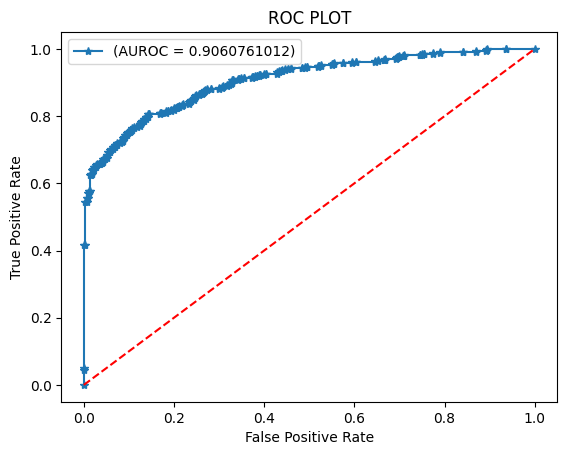

--------------------------------------------------------------------------------
SVC(kernel='linear', probability=True)
----------------------------------------------------------------------------------


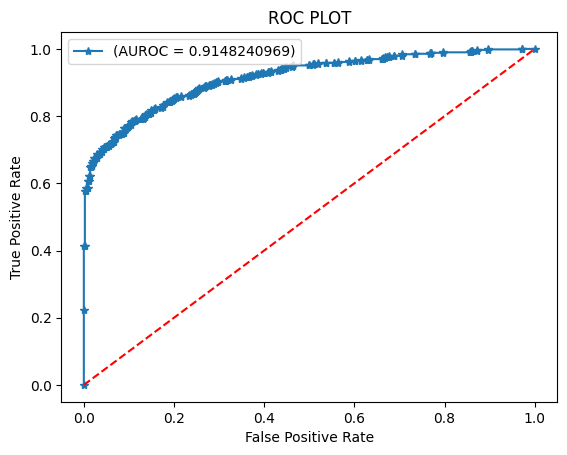

--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=10)
----------------------------------------------------------------------------------


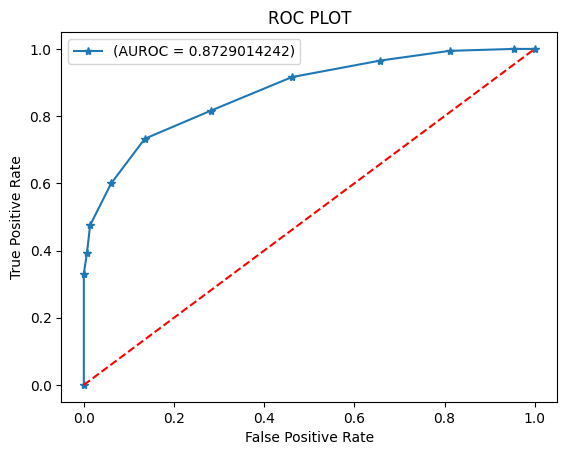

--------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
----------------------------------------------------------------------------------


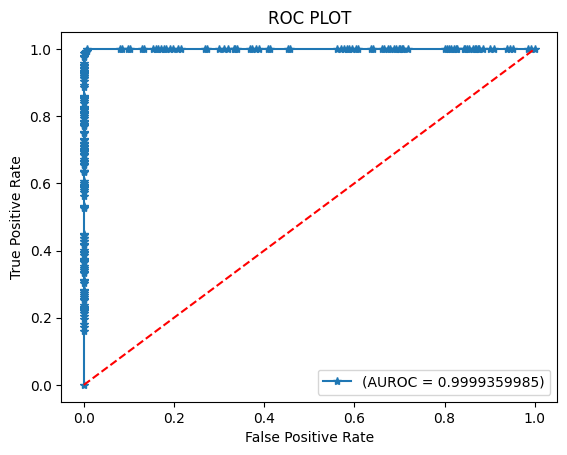

--------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------


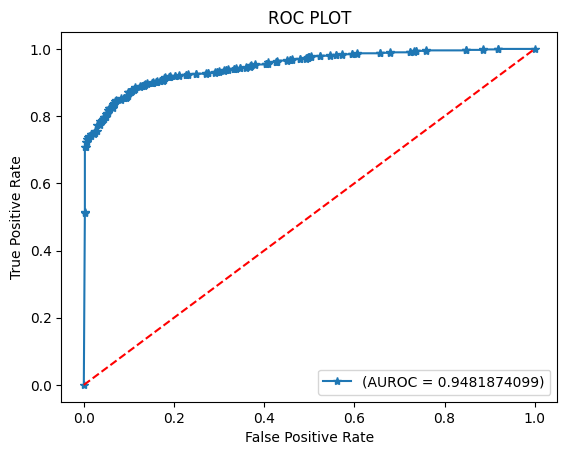

--------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
----------------------------------------------------------------------------------


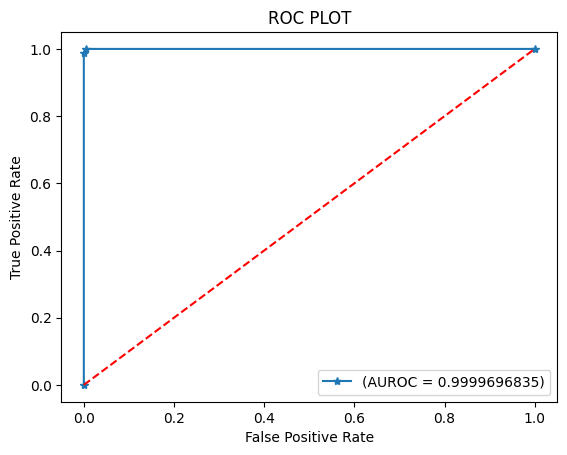

--------------------------------------------------------------------------------


In [63]:
trc_curv()

# TRAINING ROC CURVE

In [64]:
lr_probs = models[0].predict_proba(x_train)
sv_probs = models[1].predict_proba(x_train)
kn_probs = models[2].predict_proba(x_train)
rf_probs = models[3].predict_proba(x_train)
nb_probs = models[4].predict_proba(x_train)
dt_probs = models[5].predict_proba(x_train)



In [65]:
#Probabilities for the positive outcome is kept.
lr_probs = lr_probs[:, 1]
sv_probs = sv_probs[:, 1]
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]



In [66]:
lr_auc = roc_auc_score(y_train, lr_probs)
rf_auc = roc_auc_score(y_train, rf_probs)
nb_auc = roc_auc_score(y_train, nb_probs)
sv_auc = roc_auc_score(y_train, sv_probs)
kn_auc = roc_auc_score(y_train, kn_probs)
dt_auc = roc_auc_score(y_train, dt_probs)


In [67]:
#printing AUROC  scores
print('Logistic : AUROC = %.10f' % (lr_auc))
print('SVM : AUROC = %.10f' % (sv_auc))
print('Random Forest: AUROC = %.10f' % (rf_auc))
print('KNN : AUROC = %.10f' % (kn_auc))
print('Naive Bayes: AUROC = %.10f' % (nb_auc))
print('Decision Tree: AUROC = %.10f' % (dt_auc))



Logistic : AUROC = 0.9060761012
SVM : AUROC = 0.9148240969
Random Forest: AUROC = 0.9999359985
KNN : AUROC = 0.8729014242
Naive Bayes: AUROC = 0.9481874099
Decision Tree: AUROC = 0.9999696835


In [68]:
#Calculate ROC curve
lr_fpr,lr_tpr, _ = roc_curve(y_train,lr_probs)
sv_fpr,sv_tpr, _ =  roc_curve(y_train, sv_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_train, rf_probs)
kn_fpr,kn_tpr, _ = roc_curve(y_train, kn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_train, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_train, dt_probs)


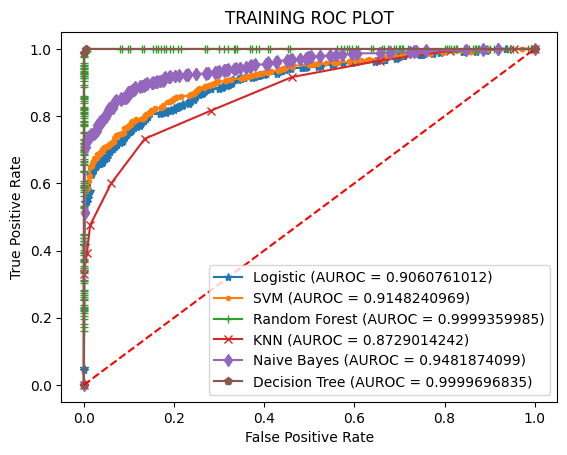

In [69]:
#plotting the diagram
plt.plot(lr_fpr,lr_tpr, marker='*', label='Logistic (AUROC = %0.10f)' % lr_auc)
plt.plot(sv_fpr,sv_tpr, marker='.', label='SVM (AUROC = %0.10f)' % sv_auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest (AUROC = %0.10f)' % rf_auc)
plt.plot(kn_fpr,kn_tpr, marker='x', label='KNN (AUROC = %0.10f)' % kn_auc)
plt.plot(nb_fpr, nb_tpr, marker='d', label='Naive Bayes (AUROC = %0.10f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='p', label='Decision Tree (AUROC = %0.10f)' % dt_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('TRAINING ROC PLOT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.savefig('roc_grpah.jpg')
plt.show()

# WORK FOR THE TEST DATA

# Comparing the performance of the model

In [70]:
def tst_train():
    lst = []
    for model in models:
        y_pred = model.predict(x_test)
        lst.append(y_pred)
    return lst

In [71]:
y_pred = tst_train()
print(y_pred)

[array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]), array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [72]:
def model_fitting():
    for i,model in enumerate(models):
        cf_matrix = confusion_matrix(test_y,y_pred[i])
        ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

        ax.set_title('Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted ')
        ax.set_ylabel('Actual  ');
        plt.show()
        print(model)
        print('*******************************************************')
        print()

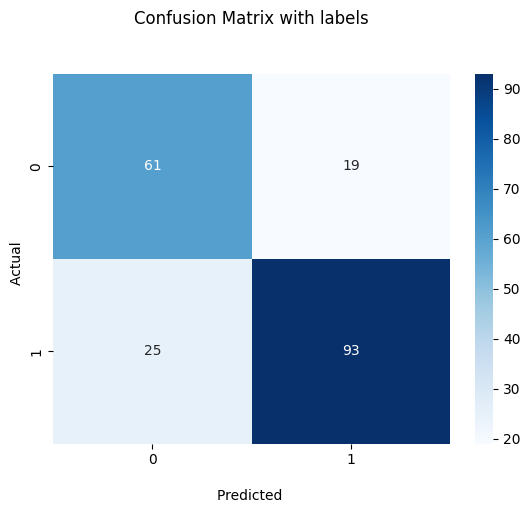

LogisticRegression(max_iter=30000)
*******************************************************



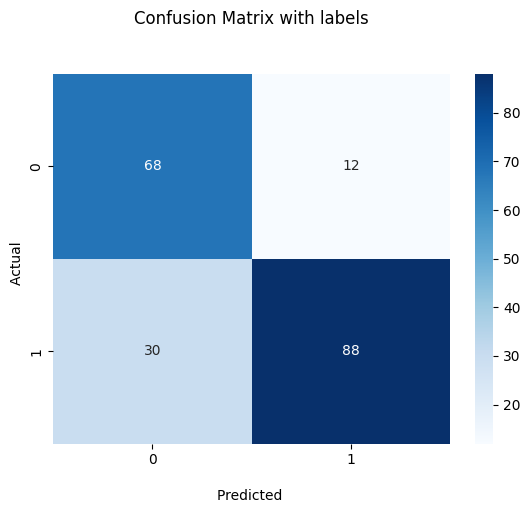

SVC(kernel='linear', probability=True)
*******************************************************



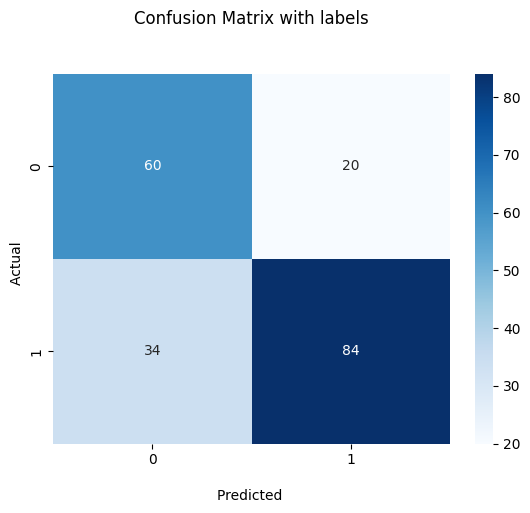

KNeighborsClassifier(n_neighbors=10)
*******************************************************



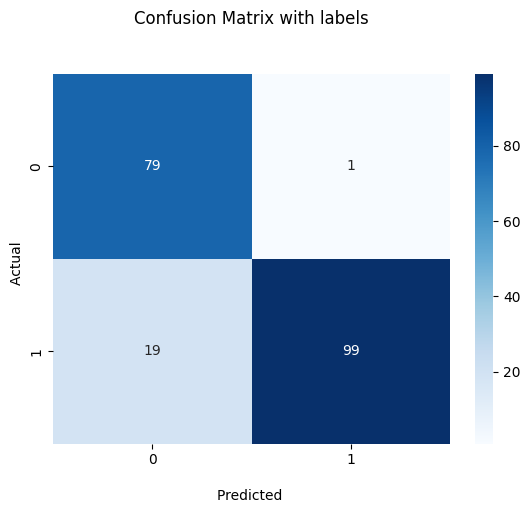

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
*******************************************************



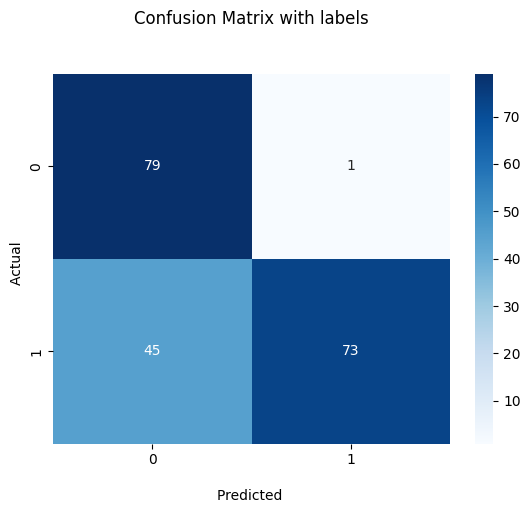

GaussianNB()
*******************************************************



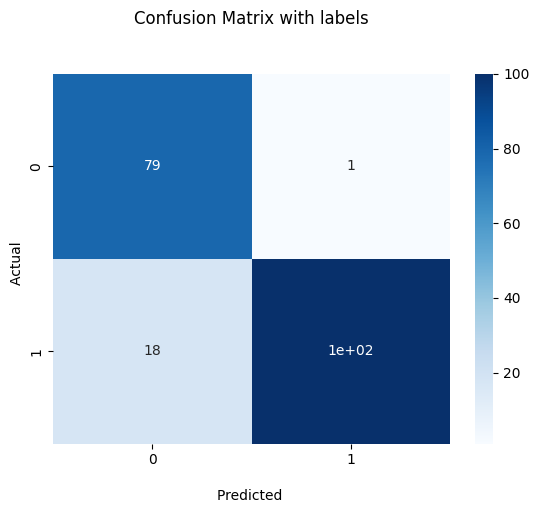

DecisionTreeClassifier(max_depth=5)
*******************************************************



In [73]:
model_fitting()

In [74]:
def comp():
    acc=[]
    pre=[]
    rec=[]
    f1_s=[]
    for i,model in enumerate(models):
        accuracy = metrics.accuracy_score(test_y,y_pred[i])
        acc.append(accuracy)
        precision = metrics.precision_score(test_y,y_pred[i])
        pre.append(precision)
        recall = metrics.recall_score(test_y, y_pred[i])
        rec.append(recall)
        fscore = metrics.f1_score(test_y, y_pred[i])
        f1_s.append(fscore)
    return acc,pre,rec,f1_s


In [75]:
acc,pre,rec,f1_s = comp()

In [76]:
def display():
    target_names = ['1', '0']
    for i,model in enumerate(models):
        print('Accuracy score of the',model,'=',acc[i],'\n')
        print('Precision score of the',model,'=',pre[i],'\n')
        print('Recall score of the',model,'=',rec[i],'\n')
        print('f1 score of the ',model,'=',f1_s[i],'\n')
        print('**********************************************************************')
        print(classification_report(test_y, y_pred[i], target_names=target_names))
        print('-------------------------------------------------------------------------')

In [77]:
display()

Accuracy score of the LogisticRegression(max_iter=30000) = 0.7777777777777778 

Precision score of the LogisticRegression(max_iter=30000) = 0.8303571428571429 

Recall score of the LogisticRegression(max_iter=30000) = 0.788135593220339 

f1 score of the  LogisticRegression(max_iter=30000) = 0.808695652173913 

**********************************************************************
              precision    recall  f1-score   support

           1       0.71      0.76      0.73        80
           0       0.83      0.79      0.81       118

    accuracy                           0.78       198
   macro avg       0.77      0.78      0.77       198
weighted avg       0.78      0.78      0.78       198

-------------------------------------------------------------------------
Accuracy score of the SVC(kernel='linear', probability=True) = 0.7878787878787878 

Precision score of the SVC(kernel='linear', probability=True) = 0.88 

Recall score of the SVC(kernel='linear', probability=True) = 

# ACCURACY GRAPH

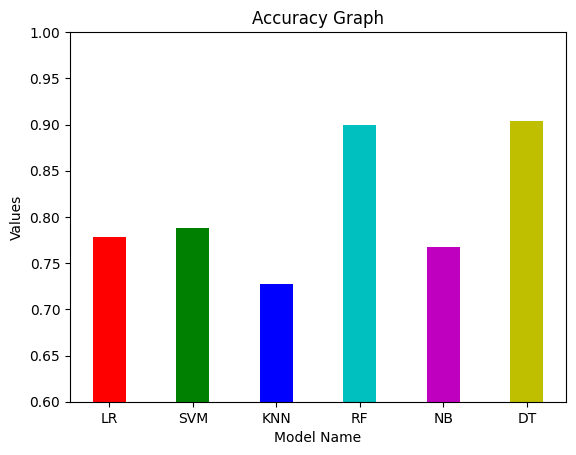

In [78]:
#graph plotting
val = {'LR':acc[0],'SVM':acc[1],'KNN':acc[2],'RF':acc[3],'NB':acc[4],'DT':acc[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()
#plt.savefig('Accuracy_bar.jpg')


In [79]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        acc[0],
        acc[1],
        acc[2],
        acc[3],
        acc[4],
        acc[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.904040
3,Random Forest,0.898990
1,SVM,0.787879
0,Logistic Regression,0.777778
4,Naive Bayes,0.767677
2,KNN,0.727273


# PRECISION GRAPH

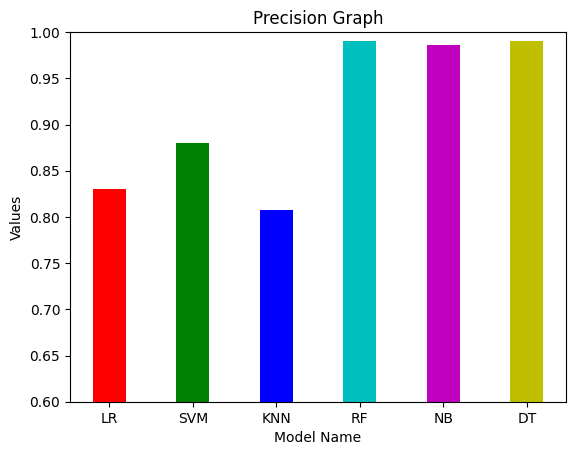

In [80]:
val = {'LR':pre[0],'SVM':pre[1],'KNN':pre[2],'RF':pre[3],'NB':pre[4],'DT':pre[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [81]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        pre[0],
        pre[1],
        pre[2],
        pre[3],
        pre[4],
        pre[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.990099
3,Random Forest,0.990000
4,Naive Bayes,0.986486
1,SVM,0.880000
0,Logistic Regression,0.830357
2,KNN,0.807692


# RECALL GRAPH

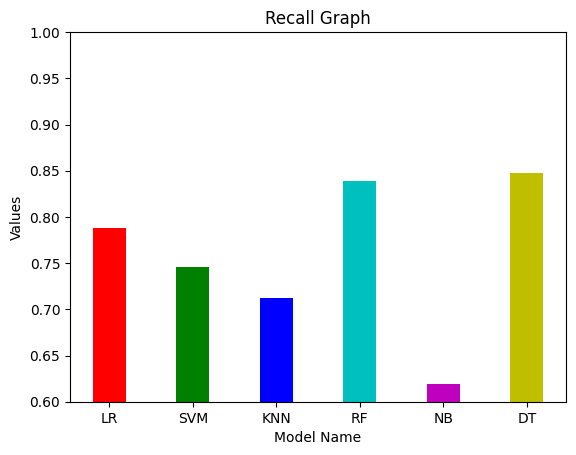

In [82]:
val = {'LR':rec[0],'SVM':rec[1],'KNN':rec[2],'RF':rec[3],'NB':rec[4],'DT':rec[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [83]:
mod = pd.DataFrame({
     'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        rec[0],
        rec[1],
        rec[2],
        rec[3],
        rec[4],
        rec[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.847458
3,Random Forest,0.838983
0,Logistic Regression,0.788136
1,SVM,0.745763
2,KNN,0.711864
4,Naive Bayes,0.618644


# F1 SCORE GRPAH

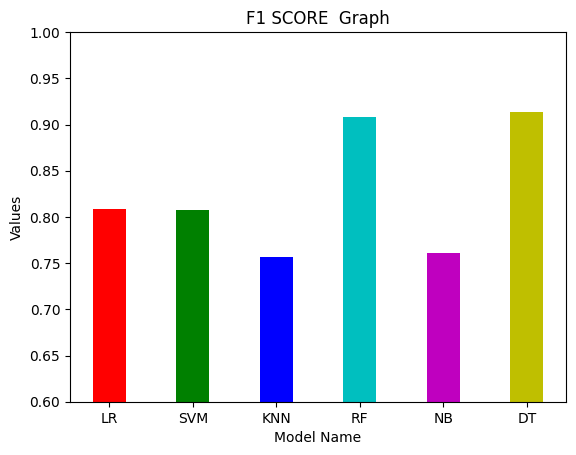

In [84]:
val = {'LR':f1_s[0],'SVM':f1_s[1],'KNN':f1_s[2],'RF':f1_s[3],'NB':f1_s[4],'DT':f1_s[5]}
model_name = list(val.keys())
values = list(val.values())


axes = plt.axes()
axes.set_ylim([0.60, 1.0])
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 SCORE  Graph')
color = ['r','g','b','c','m','y','g','r']
plt.bar(model_name,values,color=color,width = 0.4)
plt.show()

In [85]:
mod = pd.DataFrame({
    'Model': ['Logistic Regression','SVM','KNN', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [
        f1_s[0],
        f1_s[1],
        f1_s[2],
        f1_s[3],
        f1_s[4],
        f1_s[5]

    ]})
mod.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.913242
3,Random Forest,0.908257
0,Logistic Regression,0.808696
1,SVM,0.807339
4,Naive Bayes,0.760417
2,KNN,0.756757


# ROC CURVE

In [86]:
def rc_curv():
    for i,model in enumerate(models):
        cr_probs = model.predict_proba(x_test)
        cr_probs = cr_probs[:, 1]
        cr_auc = roc_auc_score(test_y, cr_probs)
        #cr_auc=np.append(cr_auc,cr_auc)
        cr_fpr,cr_tpr, _ = roc_curve(test_y,cr_probs)
        #cr_fpr=np.append(cr_fpr,cr_fpr)
        #cr_tpr=np.append(cr_tpr,cr_tpr)
        print(model)
        print('----------------------------------------------------------------------------------')
        plt.plot(cr_fpr,cr_tpr, marker='*',label='(AUROC = %0.10f)'% cr_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.title('ROC PLOT')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        #plt.savefig('roc_grpah.jpg')
        plt.show()
        print('--------------------------------------------------------------------------------')

LogisticRegression(max_iter=30000)
----------------------------------------------------------------------------------


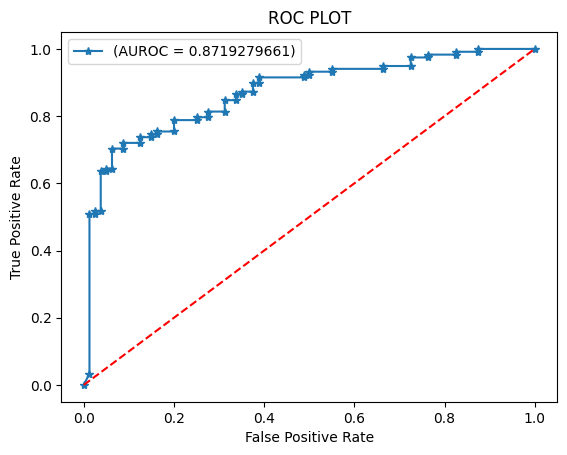

--------------------------------------------------------------------------------
SVC(kernel='linear', probability=True)
----------------------------------------------------------------------------------


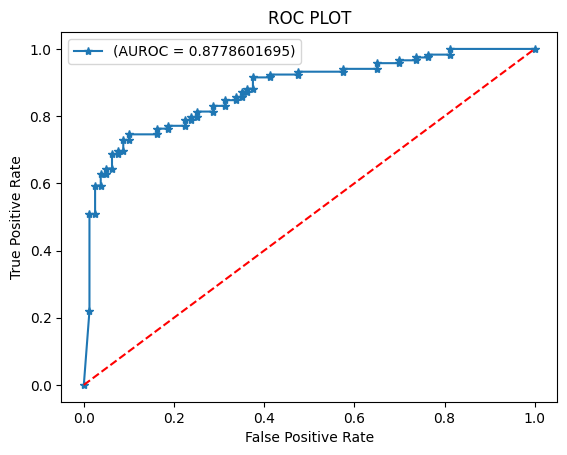

--------------------------------------------------------------------------------
KNeighborsClassifier(n_neighbors=10)
----------------------------------------------------------------------------------


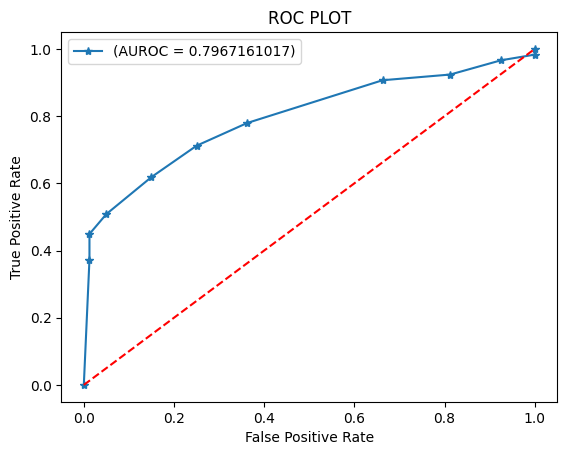

--------------------------------------------------------------------------------
RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)
----------------------------------------------------------------------------------


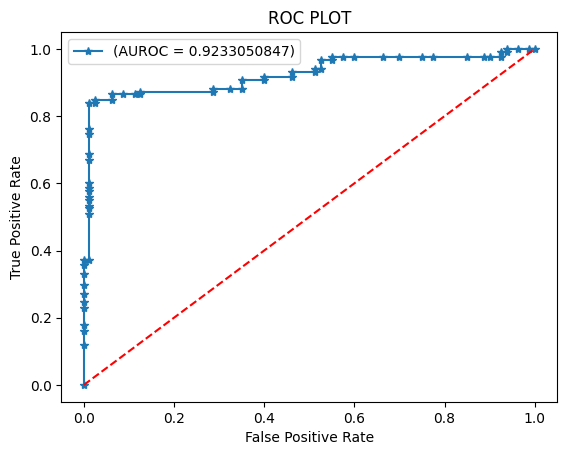

--------------------------------------------------------------------------------
GaussianNB()
----------------------------------------------------------------------------------


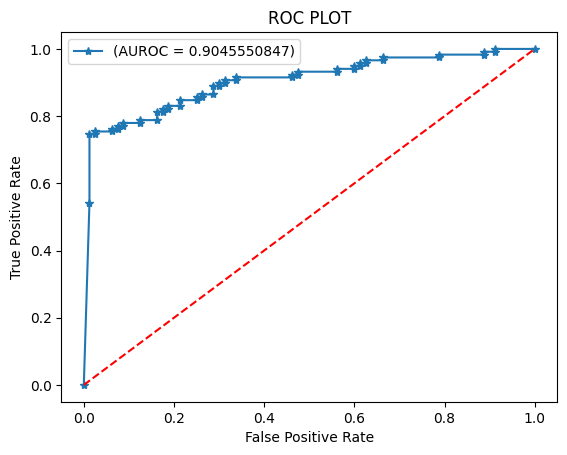

--------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=5)
----------------------------------------------------------------------------------


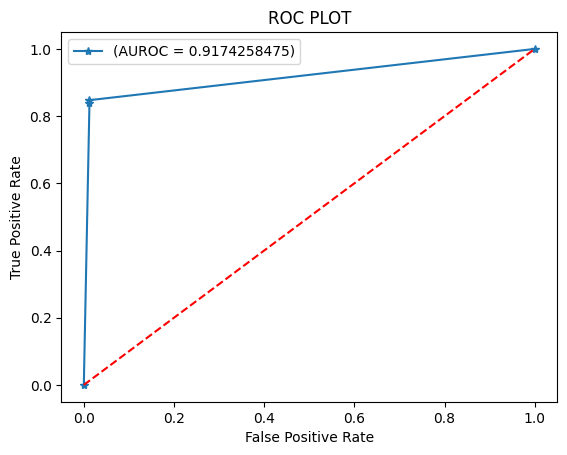

--------------------------------------------------------------------------------


In [87]:
rc_curv()

# COMMON ROC GRPAH

In [88]:
lr_probs = models[0].predict_proba(x_test)
sv_probs = models[1].predict_proba(x_test)
kn_probs = models[2].predict_proba(x_test)
rf_probs = models[3].predict_proba(x_test)
nb_probs = models[4].predict_proba(x_test)
dt_probs = models[5].predict_proba(x_test)


In [89]:
#Probabilities for the positive outcome is kept.
lr_probs = lr_probs[:, 1]
sv_probs = sv_probs[:, 1]
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
nb_probs = nb_probs[:, 1]
dt_probs = dt_probs[:, 1]

In [90]:
lr_auc = roc_auc_score(test_y, lr_probs)
rf_auc = roc_auc_score(test_y, rf_probs)
nb_auc = roc_auc_score(test_y, nb_probs)
sv_auc = roc_auc_score(test_y, sv_probs)
kn_auc = roc_auc_score(test_y, kn_probs)
dt_auc = roc_auc_score(test_y, dt_probs)


In [91]:
#printing AUROC  scores
print('Logistic : AUROC = %.10f' % (lr_auc))
print('SVM : AUROC = %.10f' % (sv_auc))
print('Random Forest: AUROC = %.10f' % (rf_auc))
print('KNN : AUROC = %.10f' % (kn_auc))
print('Naive Bayes: AUROC = %.10f' % (nb_auc))
print('Decision Tree: AUROC = %.10f' % (dt_auc))


Logistic : AUROC = 0.8719279661
SVM : AUROC = 0.8778601695
Random Forest: AUROC = 0.9233050847
KNN : AUROC = 0.7967161017
Naive Bayes: AUROC = 0.9045550847
Decision Tree: AUROC = 0.9174258475


In [92]:
#Calculate ROC curve
lr_fpr,lr_tpr, _ = roc_curve(test_y,lr_probs)
sv_fpr,sv_tpr, _ =  roc_curve(test_y, sv_probs)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_probs)
kn_fpr,kn_tpr, _ = roc_curve(test_y, kn_probs)
nb_fpr, nb_tpr, _ = roc_curve(test_y, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_probs)


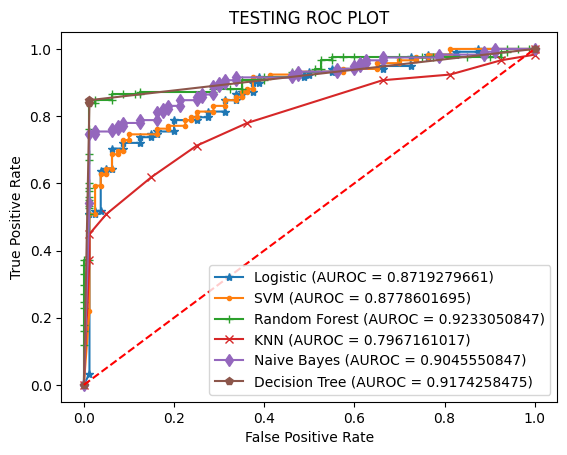

In [93]:
#plotting the diagram
plt.plot(lr_fpr,lr_tpr, marker='*', label='Logistic (AUROC = %0.10f)' % lr_auc)
plt.plot(sv_fpr,sv_tpr, marker='.', label='SVM (AUROC = %0.10f)' % sv_auc)
plt.plot(rf_fpr, rf_tpr, marker='+', label='Random Forest (AUROC = %0.10f)' % rf_auc)
plt.plot(kn_fpr,kn_tpr, marker='x', label='KNN (AUROC = %0.10f)' % kn_auc)
plt.plot(nb_fpr, nb_tpr, marker='d', label='Naive Bayes (AUROC = %0.10f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='p', label='Decision Tree (AUROC = %0.10f)' % dt_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.title('TESTING ROC PLOT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
#plt.savefig('roc_grpah.jpg')
plt.show()

Tval is for taining data and other is for test data.

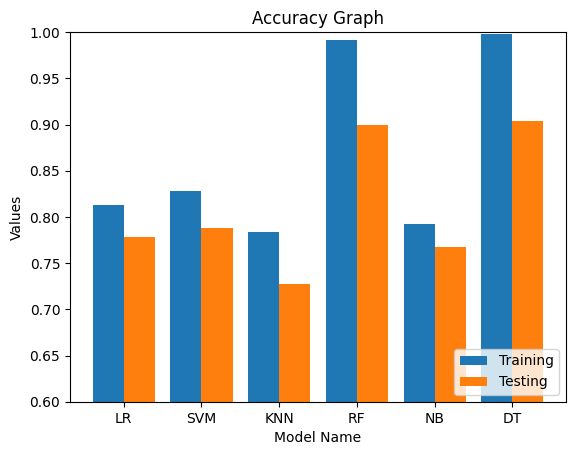

In [94]:
tval = {'LR':tacc[0],'SVM':tacc[1],'KNN':tacc[2],'RF':tacc[3],'NB':tacc[4],'DT':tacc[5]}
val = {'LR':acc[0],'SVM':acc[1],'KNN':acc[2],'RF':acc[3],'NB':acc[4],'DT':acc[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.60, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Accuracy Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("acc.png",dpi = 300)
plt.show()

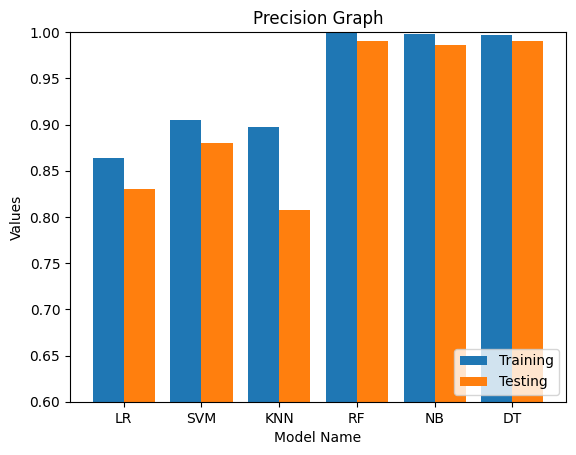

In [95]:
tval = {'LR':tprec[0],'SVM':tprec[1],'KNN':tprec[2],'RF':tprec[3],'NB':tprec[4],'DT':tprec[5]}
val = {'LR':pre[0],'SVM':pre[1],'KNN':pre[2],'RF':pre[3],'NB':pre[4],'DT':pre[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.60, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Precision Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("pre.png",dpi = 300)
plt.show()

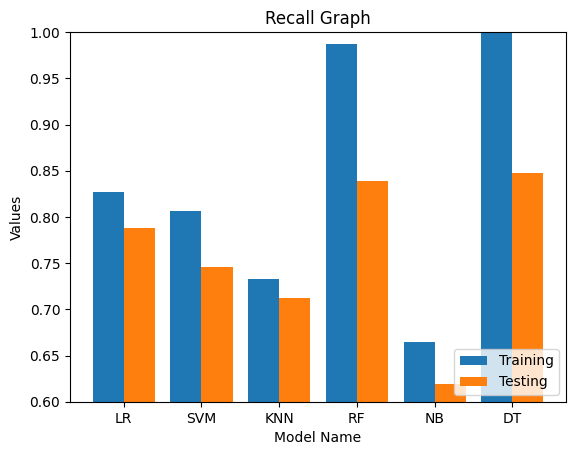

In [96]:
tval = {'LR':trec[0],'SVM':trec[1],'KNN':trec[2],'RF':trec[3],'NB':trec[4],'DT':trec[5]}
val = {'LR':rec[0],'SVM':rec[1],'KNN':rec[2],'RF':rec[3],'NB':rec[4],'DT':rec[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.60, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('Recall Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("rec.png",dpi = 300)
plt.show()

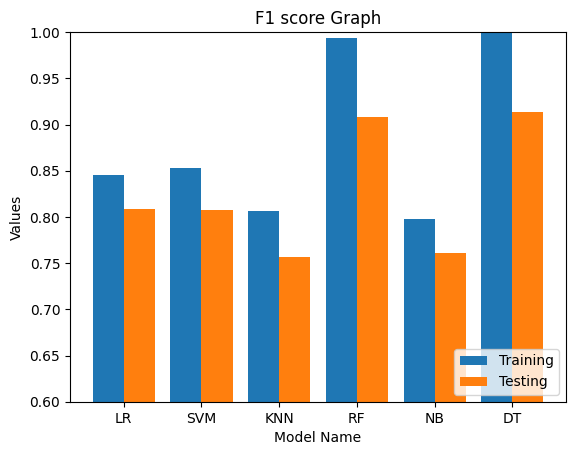

In [97]:
tval = {'LR':tf1[0],'SVM':tf1[1],'KNN':tf1[2],'RF':tf1[3],'NB':tf1[4],'DT':tf1[5]}
val = {'LR':f1_s[0],'SVM':f1_s[1],'KNN':f1_s[2],'RF':f1_s[3],'NB':f1_s[4],'DT':f1_s[5]}
model_name = list(val.keys())
train_values = list(tval.values())
test_values = list(val.values())



axes = plt.axes()
axes.set_ylim([0.60, 1.0])

x_axis = np.arange(len(model_name))

plt.xticks(x_axis, model_name)
plt.xlabel('Model Name')
plt.ylabel('Values')
plt.title('F1 score Graph')

plt.bar(x_axis -0.2,train_values,0.4,label = 'Training')
plt.bar(x_axis + 0.2,test_values,0.4,label = 'Testing')
plt.legend(loc ='lower right')
plt.savefig("f_1.png",dpi = 300)
plt.show()

In [98]:
fmodel = DecisionTreeClassifier(max_depth=5, random_state=42)
fmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [99]:
print(y_test)
print(fmodel.predict(X_test))

677     1
1046    0
610     0
49      0
1284    1
       ..
48      0
113     1
155     0
291     0
1009    0
Name: target, Length: 198, dtype: int64
[1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1
 1 0 0 1 1 1 1 1 0 1 0 0 0]


In [100]:
final_model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=50)
final_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)

In [101]:
X_test.head()

,age,gender,glucose,kcm,troponin
677,76,1,144.0,297.50,0.024
1046,30,0,93.0,3.93,0.003
610,50,1,111.0,2.55,0.006
49,38,0,133.0,1.19,0.003
1284,29,1,100.0,6.48,0.003


In [102]:
y_test.head()

677     1
1046    0
610     0
49      0
1284    1
Name: target, dtype: int64

In [103]:
age = float(input("Enter age: "))
gender = float(input("Enter gender (0 for female, 1 for male): "))
glucose = float(input("Enter glucose level: "))
kcm = float(input("Enter kcm: "))
tropohin = float(input("Enter tropohin level: "))


input_data = np.array([age, gender, glucose, kcm, tropohin])
#input_data=np.array([-1.97354908, -1.41421356, -0.68275774, -0.26445666, -0.31617185])
input_data_reshaped = input_data.reshape(1, -1)
#norm_data=scaler.fit_transform(input_data_reshaped)

#print(norm_data)
prediction = fmodel.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have Heart Disease')
else:
    print('The Person has Heart Disease')



Enter age: 76
Enter gender (0 for female, 1 for male): 1
Enter glucose level: 144.0
Enter kcm: 297.50
Enter tropohin level: 0.024
[1]
The Person has Heart Disease


In [104]:
# Default values - 64, 1, 160, 1.8, 0.012 === 0
# 76	1	144.0	297.50	0.024 ====1